In [4]:

import numpy as np                 # Linear Algebra
import pandas as pd                # Data Processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib                  # 2D Plotting Library
import matplotlib.pyplot as plt
import seaborn as sns              # Python Data Visualization Library based on matplotlib
#import geopandas as gpd            # Python Geospatial Data Library
plt.style.use('fivethirtyeight')
%matplotlib inline

#import plotly as plotly                # Interactive Graphing Library for Python
#import plotly.express as px
#import plotly.graph_objects as go
#from plotly.offline import init_notebook_mode, iplot, plot
#init_notebook_mode(connected=True)

#import folium
#import folium.plugins

#import wordcloud
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

In [29]:
data=pd.read_csv('C:\\Users\\HP\\Desktop\\Nevina Python\\GreyAtom\\Hackathon 2\\Train.csv')
test = pd.read_csv('C:\\Users\\HP\\Desktop\\Nevina Python\\GreyAtom\\Hackathon 2\\Test.csv')

In [30]:
#Missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum())*100)/data.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(40)

Total    Percent
reviews_per_month                6982  20.399696
last_review                      6982  20.399696
host_name                          13   0.037983
name                               12   0.035061
availability_365                    0   0.000000
calculated_host_listings_count      0   0.000000
number_of_reviews                   0   0.000000
minimum_nights                      0   0.000000
price                               0   0.000000
room_type                           0   0.000000
longitude                           0   0.000000
latitude                            0   0.000000
neighbourhood                       0   0.000000
neighbourhood_group                 0   0.000000
host_id                             0   0.000000
id                                  0   0.000000

In [31]:
total_test = test.isnull().sum().sort_values(ascending=False)
percent_test = ((test.isnull().sum())*100)/test.isnull().count().sort_values(ascending=False)
missing_data_test = pd.concat([total_test, percent_test], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data_test.head(40)

Total    Percent
reviews_per_month                3070  20.928489
last_review                      3070  20.928489
host_name                           8   0.054537
name                                4   0.027268
availability_365                    0   0.000000
calculated_host_listings_count      0   0.000000
number_of_reviews                   0   0.000000
minimum_nights                      0   0.000000
room_type                           0   0.000000
longitude                           0   0.000000
latitude                            0   0.000000
neighbourhood                       0   0.000000
neighbourhood_group                 0   0.000000
host_id                             0   0.000000
id                                  0   0.000000

In [32]:
data.corr().style.background_gradient(cmap='coolwarm')
#No strong correlation except number_of_reviews vs reviews_per_month

name 0.0 % missing values
host_name 0.0 % missing values
last_review 0.204 % missing values
reviews_per_month 0.204 % missing values


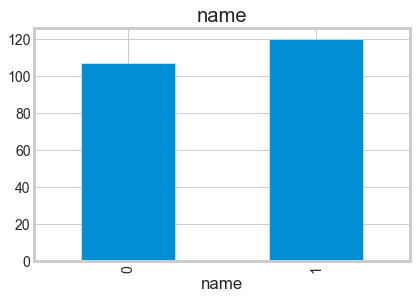

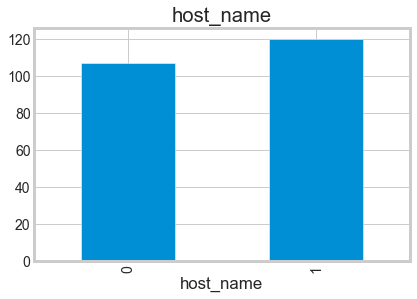

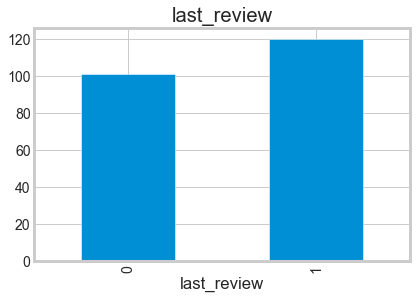

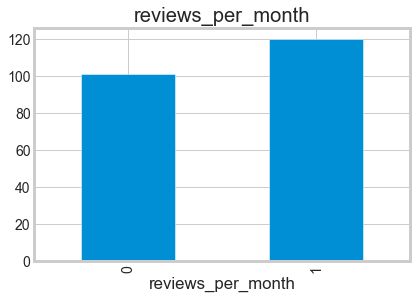

In [33]:
#make a list of the variables that contain missing values
vars_with_na=[var for var in data.columns if data[var].isnull().sum()>1]

#print the variable name and the percentage of missing values 
for var in vars_with_na:
    print(var,np.round(data[var].isnull().mean(),3),'% missing values')
    
def analyse_na_value(df,var):
    df=df.copy()
    
    #Let's make a variable that indicates 1 if the observation was missing or Zero otherwise 
    df[var]=np.where(df[var].isnull(),1,0)
    
    #Let's calculate the mean SalePrice where the information is missing or present 
    df.groupby(var)['price'].median().plot.bar()
    plt.title(var)
    plt.show()
    
for var in vars_with_na:
    analyse_na_value(data,var)
    
#Generally the price is slightly more for the rows were the data is missing

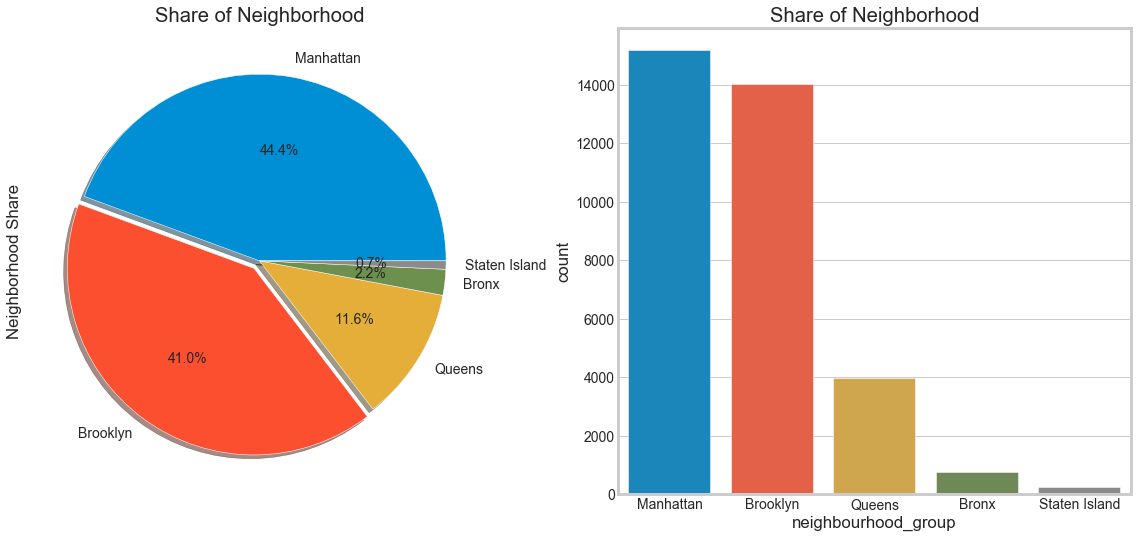

In [34]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['neighbourhood_group'].value_counts().plot.pie(explode=[0,0.05,0,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Share of Neighborhood')
ax[0].set_ylabel('Neighborhood Share')
sns.countplot('neighbourhood_group',data=data,ax=ax[1],order=data['neighbourhood_group'].value_counts().index)
ax[1].set_title('Share of Neighborhood')
plt.show()

#Manhatten and Brooklyn have the highest share of hotels.

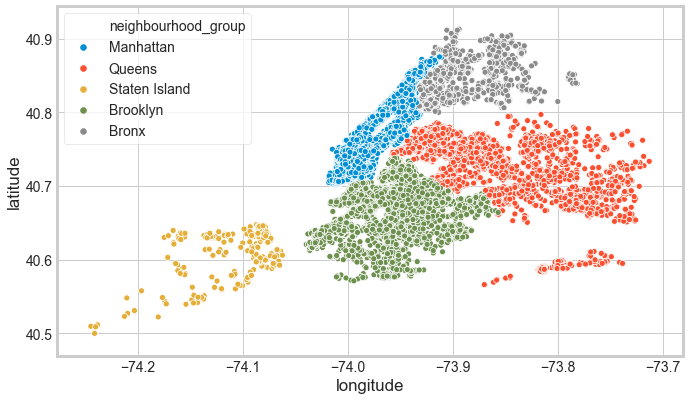

In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.longitude,data.latitude,hue=data.neighbourhood_group)
plt.ioff()

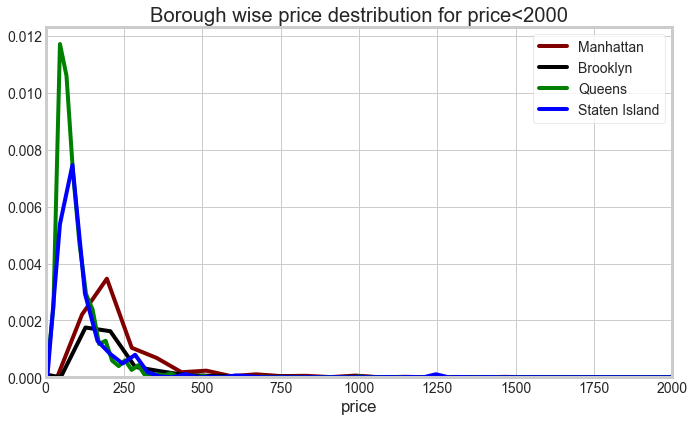

In [36]:
plt.figure(figsize=(10,6))
sns.distplot(data[data.neighbourhood_group=='Manhattan'].price,color='maroon',hist=False,label='Manhattan')
sns.distplot(data[data.neighbourhood_group=='Brooklyn'].price,color='black',hist=False,label='Brooklyn')
sns.distplot(data[data.neighbourhood_group=='Queens'].price,color='green',hist=False,label='Queens')
sns.distplot(data[data.neighbourhood_group=='Staten Island'].price,color='blue',hist=False,label='Staten Island')
sns.distplot(data[data.neighbourhood_group=='Long Island'].price,color='lavender',hist=False,label='Long Island')
plt.title('Borough wise price destribution for price<2000')
plt.xlim(0,2000)
plt.show()

#Area wise distribution of price shows that Manhattan has expensive and Staten Island has low priced rooms

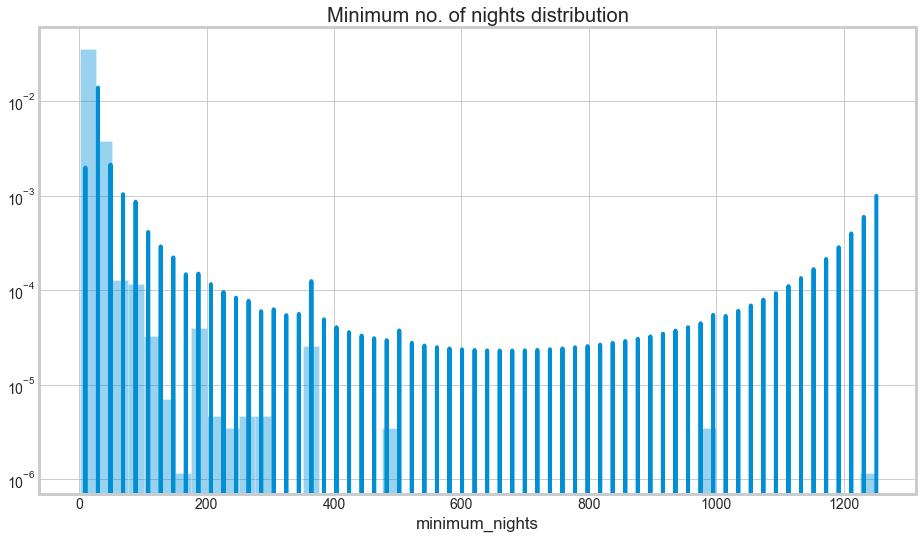

In [37]:
plt.figure(figsize=(14,8))
sns.distplot(data.minimum_nights).set_yscale('log')
plt.title('Minimum no. of nights distribution')
plt.show()

<Figure size 720x432 with 0 Axes>

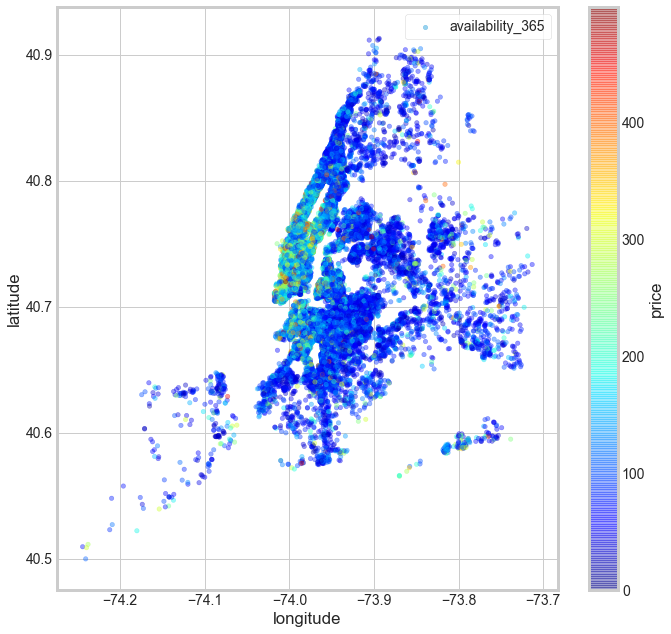

In [38]:
plt.figure(figsize=(10,6));
sub_6=data[data.price<500];
viz_4=sub_6.plot(kind='scatter', x='longitude',y='latitude',label='availability_365',c='price',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4,figsize=(10,10));
viz_4.legend();
plt.ioff();

#Red color dots are the apartment or rooms with higher price.I have considered prices upto 300 $ to get a good representation on the plot.We can see that Manhattan region has more expensive apartments.

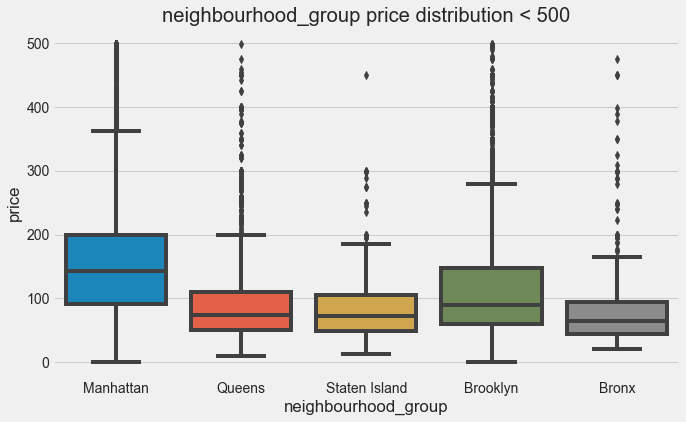

In [39]:
plt.style.use('fivethirtyeight')
ng = data[data.price <500]
plt.figure(figsize=(10,6))
sns.boxplot(y="price",x ='neighbourhood_group' ,data = ng)
plt.title("neighbourhood_group price distribution < 500")
plt.show()

#Manhattan has the most expensive accomodation followed by Brooklyn

In [40]:
def rank_price(hotel_price):
    if hotel_price<=75:
        return 'Low'
    elif hotel_price >75 and hotel_price<=500:
        return 'Medium'
    else:
        return 'High'

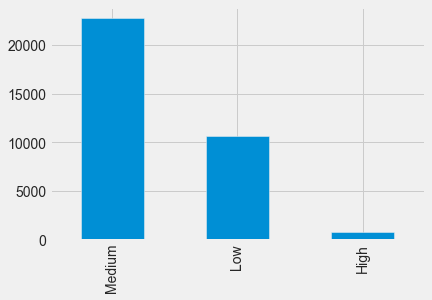

In [41]:
data['price'].apply(rank_price).value_counts().plot(kind='bar');

#So most of the rooms fall in the Medium (75-200 $) category

In [42]:
#using groupby to group two columns neighbourhood and price also find mean of price along with sorting the values and resetting index
df_top_prices_by_neighbourhood = data.groupby('neighbourhood').agg({'price': 'mean'}).sort_values('price').reset_index()

In [43]:
df_top_prices_by_neighbourhood.columns

Index(['neighbourhood', 'price'], dtype='object')

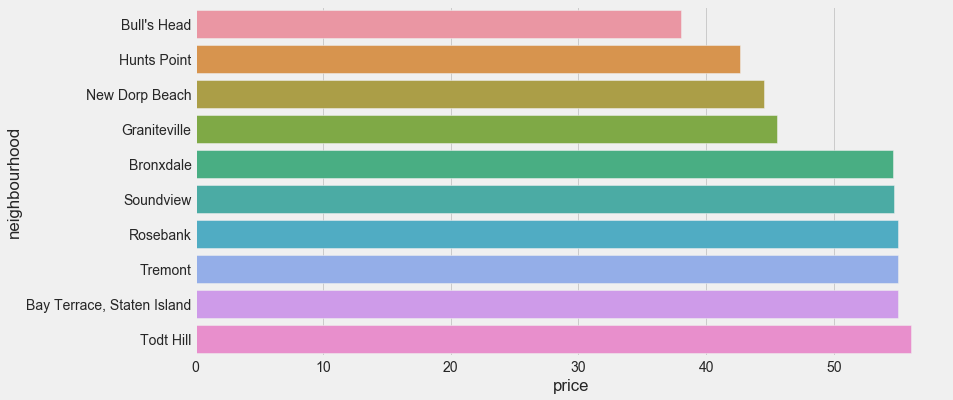

In [44]:
plt.figure(figsize=(12,6))
sns.barplot(y="neighbourhood", x="price", data=df_top_prices_by_neighbourhood.head(10))
plt.ioff()

#Bulls Head, Hunts Point and Tremont are the neighbourhoods with least price

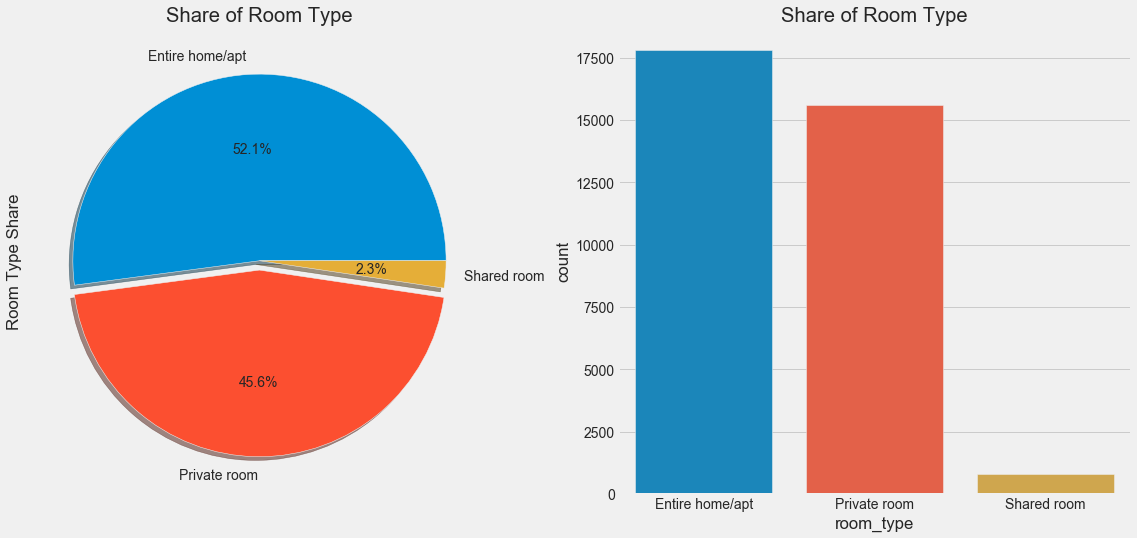

In [45]:
plt.style.use('fivethirtyeight')
f,ax=plt.subplots(1,2,figsize=(18,8))
data['room_type'].value_counts().plot.pie(explode=[0,0.05,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Share of Room Type')
ax[0].set_ylabel('Room Type Share')
sns.countplot('room_type',data=data,ax=ax[1],order=data['room_type'].value_counts().index)
ax[1].set_title('Share of Room Type')
plt.show()

#We can see that Entire home apartment has highest share followed by private room and least prefered is shared room

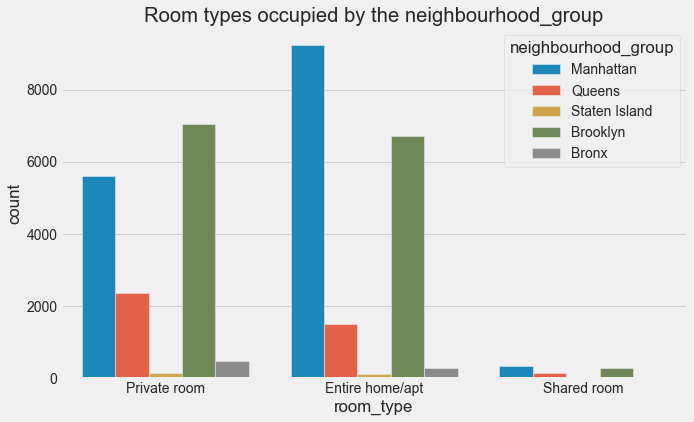

In [46]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'room_type',hue = "neighbourhood_group",data = data)
plt.title("Room types occupied by the neighbourhood_group")
plt.show()

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x432 with 0 Axes>

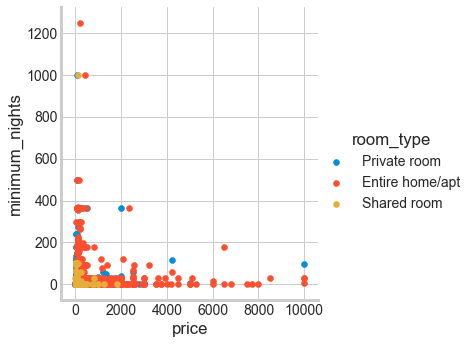

In [47]:
# soure: previous project
plt.figure(figsize=(10,6))
sns.set_style("whitegrid");
sns.FacetGrid(data,hue='room_type',size=5).map(plt.scatter,'price','minimum_nights').add_legend()
plt.ioff()
plt.show()

#We can see that rooms with low minimum nights have high price.As mentioned before Home/Apt have the highest price.

In [48]:
# Preparing the data 
data.drop(['name','host_name','last_review'],axis=1,inplace=True)
data['reviews_per_month']=data['reviews_per_month'].replace(np.nan, 0)

In [50]:
data.shape

(34226, 13)

In [49]:
# Preparing the data 
test.drop(['name','host_name','last_review'],axis=1,inplace=True)
test['reviews_per_month']=test['reviews_per_month'].replace(np.nan, 0)

In [51]:
test.shape

(14669, 12)

In [52]:
'''Encode labels with value between 0 and n_classes-1.'''
le = preprocessing.LabelEncoder()                                            # Fit label encoder
le.fit(data['neighbourhood_group'])
data['neighbourhood_group']=le.transform(data['neighbourhood_group'])    # Transform labels to normalized encoding.

le = preprocessing.LabelEncoder()
le.fit(data['neighbourhood'])
data['neighbourhood']=le.transform(data['neighbourhood'])

le = preprocessing.LabelEncoder()
le.fit(data['room_type'])
data['room_type']=le.transform(data['room_type'])

data.sort_values(by='price',ascending=True,inplace=True)

data.head()

id   host_id  neighbourhood_group  neighbourhood  latitude  \
2133   20639628  86327101                    1             13  40.68173   
32184  20624541  10132166                    1            212  40.70838   
26630  18750597   8993084                    1             13  40.69023   
30259  20523843  15787004                    1             28  40.69467   
11638  20639792  86327101                    1             13  40.68279   

       longitude  room_type  price  minimum_nights  number_of_reviews  \
2133   -73.91342          1      0               1                 93   
32184  -73.94645          0      0               5                  3   
26630  -73.95428          1      0               4                  1   
30259  -73.92433          1      0               2                 16   
11638  -73.91170          1      0               1                 95   

       reviews_per_month  calculated_host_listings_count  availability_365  
2133                4.28                               6               176  
32184               0.15                               1                73  
26630               0.05                               4                28  
30259               0.71                               5                 0  
11638               4.37                               6               232

In [54]:
test.shape

(14669, 12)

In [70]:
'''Train LRM'''
lm = LinearRegression()

X = data[['id','host_id','neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
y_pred=lm.predict(X_test)

In [72]:
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(y_test,y_pred))
rmse

234.9794370461276

In [73]:
'''Gradient Boosted Regressor'''
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01)
GBoost.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [74]:
predicts2 = GBoost.predict(X_test)
predicts2

array([157.35065396, 261.867967  ,  44.24163644, ...,  85.05593084,
        78.72121645, 188.71406849])

In [75]:
from sklearn.metrics import mean_squared_error
import math
rmse_gb = math.sqrt(mean_squared_error(y_test,predicts2))
rmse_gb

232.19417393303794

In [76]:
'''Encode labels with value between 0 and n_classes-1.'''
le = preprocessing.LabelEncoder()                                            # Fit label encoder
le.fit(test['neighbourhood_group'])
test['neighbourhood_group']=le.transform(test['neighbourhood_group'])    # Transform labels to normalized encoding.

le = preprocessing.LabelEncoder()
le.fit(test['neighbourhood'])
test['neighbourhood']=le.transform(test['neighbourhood'])

le = preprocessing.LabelEncoder()
le.fit(test['room_type'])
test['room_type']=le.transform(test['room_type'])

test.head()

id    host_id  neighbourhood_group  neighbourhood  latitude  \
0   1525602    1200603                    1             49  40.66751   
1  30430185  224414117                    2             93  40.75655   
2  21354525   11743513                    1             24  40.69252   
3  35995074    4128829                    3             52  40.77292   
4  34392081  259630588                    1            200  40.71863   

   longitude  room_type  minimum_nights  number_of_reviews  reviews_per_month  \
0  -73.95867          0               2                121               1.70   
1  -73.99690          1               1                 18               2.49   
2  -73.99121          1               1                 87               4.29   
3  -73.90101          1               9                  0               0.00   
4  -73.94980          1               1                 28              14.00   

   calculated_host_listings_count  availability_365  
0                               1                39  
1                              30               364  
2                               1               108  
3                               2               365  
4                               2                20

In [77]:
test['price'] = GBoost.predict(test) 

In [78]:
id_col = test['id']

In [79]:
#Creating Final Submission file
submissions_3 = pd.concat([id_col, test['price']], axis=1)
submissions_3.to_csv('submission_3.csv', index=False)
submissions_3

id       price
0       1525602  142.569394
1      30430185   72.490075
2      21354525   93.360767
3      35995074  123.502396
4      34392081   87.072555
...         ...         ...
14664  27730191  142.909810
14665  29676417  264.883534
14666   1813829   56.385146
14667  25017403  258.493358
14668  19057073  129.097578

[14669 rows x 2 columns]

In [80]:
rfr_baseline = RandomForestRegressor(random_state=42)
rfr_baseline.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [81]:
y_test_rfr = rfr_baseline.predict(X_test)
y_test_rfr

array([167.14, 199.74,  47.29, ..., 105.82,  93.45, 208.77])

In [82]:
from sklearn.metrics import mean_squared_error
import math
rmse_rfr = math.sqrt(mean_squared_error(y_test,y_test_rfr))
rmse_rfr

231.86695909995709

In [83]:
test.head()

id    host_id  neighbourhood_group  neighbourhood  latitude  \
0   1525602    1200603                    1             49  40.66751   
1  30430185  224414117                    2             93  40.75655   
2  21354525   11743513                    1             24  40.69252   
3  35995074    4128829                    3             52  40.77292   
4  34392081  259630588                    1            200  40.71863   

   longitude  room_type  minimum_nights  number_of_reviews  reviews_per_month  \
0  -73.95867          0               2                121               1.70   
1  -73.99690          1               1                 18               2.49   
2  -73.99121          1               1                 87               4.29   
3  -73.90101          1               9                  0               0.00   
4  -73.94980          1               1                 28              14.00   

   calculated_host_listings_count  availability_365       price  
0                               1                39  142.569394  
1                              30               364   72.490075  
2                               1               108   93.360767  
3                               2               365  123.502396  
4                               2                20   87.072555

In [93]:
test['price'] = rfr_baseline.predict(test) 

In [87]:
X_train.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [91]:
test.drop(columns=['price'], axis=1,inplace=True)

In [92]:
test.shape

(14669, 12)

In [94]:
#Creating Final Submission file
submissions_4 = pd.concat([id_col, test['price']], axis=1)
submissions_4.to_csv('submission_4.csv', index=False)
submissions_4

id   price
0       1525602  154.36
1      30430185  195.50
2      21354525   96.62
3      35995074   95.44
4      34392081   98.93
...         ...     ...
14664  27730191  122.82
14665  29676417  232.11
14666   1813829   74.42
14667  25017403  278.41
14668  19057073  115.98

[14669 rows x 2 columns]

In [97]:
xbgreg_best = XGBRegressor(n_estimators=1000, learning_rate=0.1, early_stopping=5, max_depth=5, min_child_weight=1 )
xbgreg_best.fit(X_train, y_train)
y_test_xgbreg = xbgreg_best.predict(X_test)
y_test_xgbreg

array([141.64687, 161.40178, 200.90373, ...,  87.50156,  81.73927,
       188.89159], dtype=float32)

In [106]:
from sklearn.metrics import mean_squared_error
import math
rmse_xgbreg = math.sqrt(mean_squared_error(y_test,y_test_xgbreg))
rmse_xgbreg

235.53709172593864

In [96]:
from xgboost import XGBRegressor

In [102]:
test.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'price'],
      dtype='object')

In [103]:
test.drop(columns=['price'], axis=1,inplace=True)

In [104]:
test['price'] = xbgreg_best.predict(test) 

In [105]:
#Creating Final Submission file
submissions_5 = pd.concat([id_col, test['price']], axis=1)
submissions_5.to_csv('submission_5.csv', index=False)
submissions_5

id       price
0       1525602  133.723618
1      30430185  200.037384
2      21354525  111.535141
3      35995074  623.886292
4      34392081   92.938812
...         ...         ...
14664  27730191  140.584641
14665  29676417  215.630692
14666   1813829   99.458336
14667  25017403  192.990479
14668  19057073  129.188324

[14669 rows x 2 columns]

In [109]:
rf = RandomForestRegressor(random_state=42)
from pprint import pprint
print('Parameters currently in use: \n')
pprint(rf.get_params())

Parameters currently in use: 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [111]:
#Number of trees in the forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop=2000,num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [115]:
best_random = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=1400,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [116]:
best_random.fit(X_train, y_train) 
y_train_rfr = best_random.predict(X_train)
y_test_rfr = best_random.predict(X_test)
y_test_rfr

array([154.20977664, 225.98230793,  50.92400452, ...,  95.67050391,
        89.42514767, 165.78829873])

In [117]:
from sklearn.metrics import mean_squared_error
import math
rmse_rfr = math.sqrt(mean_squared_error(y_test,y_test_rfr))
rmse_rfr

224.7894254907788

In [118]:
test.drop(columns=['price'], axis=1,inplace=True)

In [119]:
test['price'] = best_random.predict(test) 

In [120]:
#Creating Final Submission file
submissions_6 = pd.concat([id_col, test['price']], axis=1)
submissions_6.to_csv('submission_6.csv', index=False)
submissions_6

id       price
0       1525602  141.662618
1      30430185  179.439242
2      21354525   97.633815
3      35995074  163.798287
4      34392081   95.532651
...         ...         ...
14664  27730191  137.620675
14665  29676417  198.066747
14666   1813829   74.450163
14667  25017403  254.534827
14668  19057073  127.193754

[14669 rows x 2 columns]